# Assignment - Week 1
## Predicting Bitcoin Prices with Least Squares Method
Sebastian Molina Diaz - [smolinad@unal.edu.co](mailto:smolinad@unal.edu.co)  
Universidad Nacional de Colombia

- Related with the nature of the data, which conditions should meet matrices  𝐴  and  𝑏  to be solvable from the least squares perspective.

Firstly, it is clear that the system $Ax=b$ should be inconsistent. Otherwise, the solution to the least squares method is exactly the canonical solution to the system of equations. For this reason, $b$ cannot be a linear combination of the column vectors of $A$. Now, related to the data, as we proved in class, the solutions by the least square method for $Ax=b$ is the solution set for $A^TAx=A^Tb$, or equivalently, $A^TAx=0$. As $A^TA$ is a square matrix, $Ax=b$ has a unique solution if and only if the column vectors of $A$ are linearly independent, by the [Invertible Matrix Theorem](https://mathworld.wolfram.com/InvertibleMatrixTheorem.html). 

- Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

### Importing Packages

In [1]:
using Pkg
Pkg.add("AlphaVantage")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("Dates")
Pkg.add("SpecialMatrices")
Pkg.add("Polynomials")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


### Importing Bitcoin Prices

Using the AlphaVantage API, stock and markets data can be easily imported into the notebook. AlphaVantage requires a free API key that can be requested **[here](https://www.alphavantage.co/support/#api-key)**. `ALPHAVANTAGE_KEY` was saved as an environment variable and called with the command `ENV[]`.

In [2]:
using AlphaVantage
client = AlphaVantage.GLOBAL[]
client.key = ENV["ALPHAVANTAGE_KEY"];

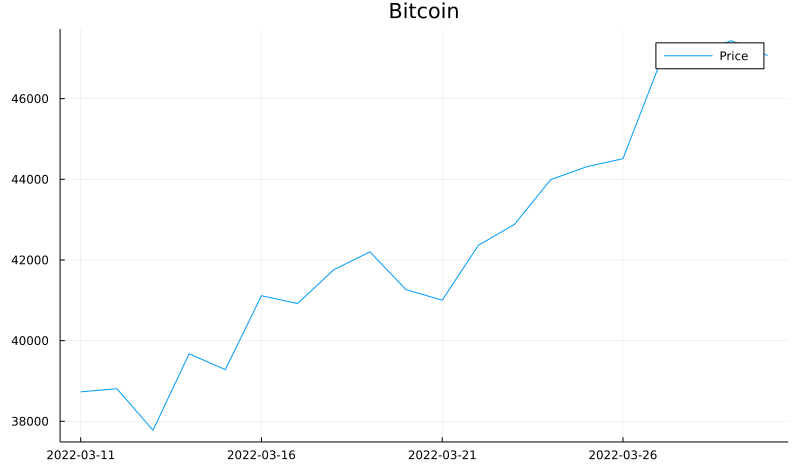

In [3]:
using DataFrames
using Plots
using Dates

gr(size=(800,470))

btcRaw = digital_currency_daily("BTC", "USD", datatype="csv");
btc = DataFrame(btcRaw[1], :auto);
btc = rename(btc, Symbol.(vcat(btcRaw[2]...)), makeunique=true);
btc.Date = Date.(btc.timestamp);
btc.Price = Float64.(btc[!, Symbol("close (USD)_1")]);

btcToPredict = first(btc[:,[:Date, :Price]], 27)
btcToPredict = last(btcToPredict[:,[:Date, :Price]], 20)

plot(btcToPredict.Date, btcToPredict.Price, label="Price", title = "Bitcoin")

### Least Squares Method

In [4]:
days = [i for i in 1:length(btcToPredict.Price)]
col1 = sin.(days)
col2 = days

matrix = [col1 col2]
matrixT = transpose(matrix)

A = matrixT*matrix
b = matrixT*btcToPredict.Price
p = A\b 

2-element Vector{Float64}:
 4049.82262830461
 2988.897956054971

In [5]:
f(x) = p[1]*sin(x) + p[2]*x

prediction = Vector{Float64}()
for i in 1:7 
    append!(prediction, f(length(btcToPredict.Price)+i))
end

prediction

7-element Vector{Float64}:
 66155.16401419636
 65719.90880055497
 65317.610447902654
 68066.11920316186
 74186.4477889326
 80799.57332558645
 84573.3976895026

### Error Analysis

In [6]:
first(btc.Price, 7)

7-element Vector{Float64}:
 44927.1
 45497.55
 46580.51
 46407.35
 45811.0
 46283.49
 45510.34

In [7]:
absErr = abs.(first(btc.Price, 7) - prediction)

7-element Vector{Float64}:
 21228.06401419636
 20222.35880055497
 18737.100447902652
 21658.769203161857
 28375.447788932594
 34516.08332558645
 39063.0576895026

In [8]:
(absErr./first(btc.Price, 7))

7-element Vector{Float64}:
 0.4725002062050825
 0.44447137924031
 0.4022519385876765
 0.466709889773104
 0.6194024969752372
 0.7457536872346154
 0.8583336817413934

In [9]:
using DataFrames
using Plots
using Dates

gr(size=(800,470))

silverRaw = currency_exchange_rate("XAG", "USD")
println(silverRaw)

Dict{String, Any}("Realtime Currency Exchange Rate" => Dict{String, Any}("8. Bid Price" => "24.36845000", "2. From_Currency Name" => nothing, "6. Last Refreshed" => "2022-04-06 03:59:01", "9. Ask Price" => "24.36845000", "4. To_Currency Name" => "United States Dollar", "3. To_Currency Code" => "USD", "1. From_Currency Code" => "XAG", "7. Time Zone" => "UTC", "5. Exchange Rate" => "24.36845000"))
